In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [175]:
df = pd.read_csv('../data/incidents_train.csv', index_col=0)

In [13]:
df.head()

,year,month,day,country,title,text,hazard-category,product-category,hazard,product
0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage
2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast


In [14]:
df['hazard-category'].value_counts(normalize=True)

hazard-category
allergens                         0.364817
biological                        0.342582
foreign bodies                    0.110390
fraud                             0.073003
chemical                          0.056474
other hazard                      0.026368
packaging defect                  0.010626
organoleptic aspects              0.010429
food additives and flavourings    0.004723
migration                         0.000590
Name: proportion, dtype: float64

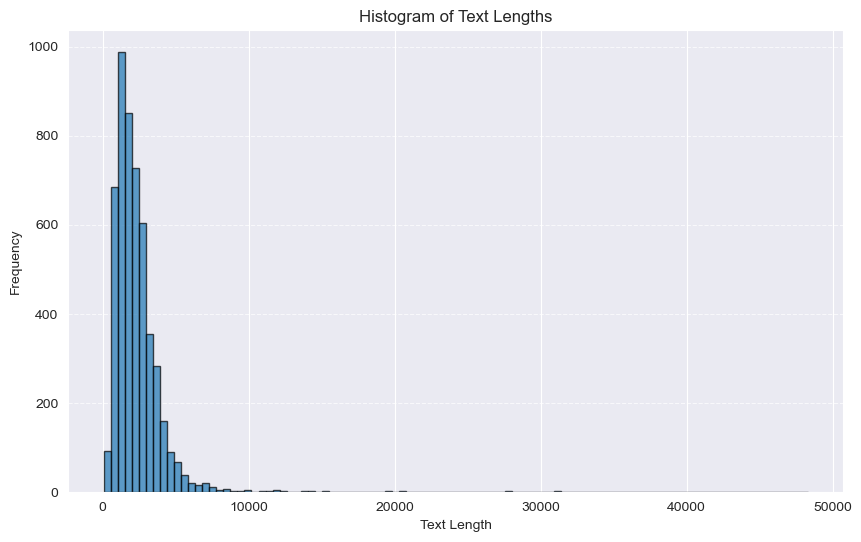

In [18]:
# Compute lengths of titles
df['text_length'] = df['text'].apply(len)

# Plot histogram of title lengths
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=100, edgecolor='black', alpha=0.7)
plt.title('Histogram of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
df['text_length'].describe()

count     5082.000000
mean      2335.492326
std       2084.718355
min         62.000000
25%       1254.250000
50%       1946.000000
75%       2814.750000
max      48318.000000
Name: text_length, dtype: float64

In [16]:
df['product-category'].value_counts(normalize=True)

product-category
meat, egg and dairy products                         0.282172
cereals and bakery products                          0.132035
fruits and vegetables                                0.105274
prepared dishes and snacks                           0.092287
seafood                                              0.052735
soups, broths, sauces and condiments                 0.051948
nuts, nut products and seeds                         0.051555
ices and desserts                                    0.043684
cocoa and cocoa preparations, coffee and tea         0.041322
confectionery                                        0.033451
non-alcoholic beverages                              0.026368
dietetic foods, food supplements, fortified foods    0.025777
herbs and spices                                     0.024597
alcoholic beverages                                  0.011610
other food product / mixed                           0.010823
pet feed                                             

In [10]:
df[['title', 'clean_title']].head(50)

,title,clean_title
0,Recall Notification: FSIS-024-94,None
1,Recall Notification: FSIS-033-94,None
2,Recall Notification: FSIS-014-94,None
3,Recall Notification: FSIS-009-94,None
4,Recall Notification: FSIS-001-94,None
5,Recall Notification: FSIS-044-94,None
6,Recall Notification: FSIS-005-94,None
7,Recall Notification: FSIS-045-94,None
8,Recall Notification: FSIS-018-94,None
9,Recall Notification: FSIS-026-94,None


In [178]:
def clean_title(title):
    # Step 1: Remove underscores
    title = re.sub(r'_', ' ', title)

    # Step 2: Remove dates in various formats
    title = re.sub(r'\b\d{1,2}[-_/]\d{1,2}[-_/]\d{2,4}\b', '', title)  # Remove MM/DD/YYYY or similar
    title = re.sub(r'\b\d{4}[-_/]\d{1,2}[-_/]\d{1,2}\b', '', title)  # Remove YYYY-MM-DD
    title = re.sub(r'\b\d{1,2}\s+\w+\s+\d{4}\b', '', title, flags=re.IGNORECASE)  # Remove "12 July 2023"
    title = re.sub(r'\b\d{4}\b', '', title)  # Remove standalone years
    title = re.sub(r'^\d{4}\s*', '', title)  # Remove leading years

    # Step 3: Remove R trademark symbol and other symbols
    title = re.sub(r'\u00AE|®', '', title)  # Remove R trademark symbol

    # Step 4: Remove HTML entities and other character encodings
    title = re.sub(r'&[a-zA-Z]+;', '', title)  # Remove entities like &rsquo; and &amp

    # Step 5: Remove unnecessary patterns
    title = re.sub(r'^Recall Notification:?\s*', '', title, flags=re.IGNORECASE)  # Remove specific prefixes
    title = re.sub(r'FSIS-\d+-\d+', '', title)  # Remove case numbers
    title = re.sub(r'\bReport\s*\d+-?\s*', '', title, flags=re.IGNORECASE)  # Remove "Report 064-2013"

    # Step 6: Remove parentheses
    title = re.sub(r'[()]', '', title)  # Remove parentheses

    # Step 7: Remove trailing hyphens
    title = re.sub(r'-\s*$', '', title)  # Remove strictly trailing hyphens

    # Step 8: Remove extra dashes and colons
    title = re.sub(r'\s+-\s+', ' ', title)  # Remove dashes surrounded by spaces
    title = re.sub(r'^:\s*', '', title)  # Remove leading colons
    title = re.sub(r'\s*:\s*$', '', title)  # Remove trailing colons

    # Step 9: Normalize whitespace
    title = re.sub(r'\s+', ' ', title).strip()

    # If cleaning results in an empty title, return an empty string
    return title

def filter_dataset(dataset):
    # Apply cleaning function
    dataset['clean_title'] = dataset['title'].apply(clean_title)
    # Remove rows with empty cleaned titles
    dataset = dataset[dataset['clean_title'] != '']
    # Remove rows with fewer than 3 words in the cleaned title
    dataset = dataset[dataset['clean_title'].str.split().str.len() >= 3].reset_index(drop=True)
    return dataset

# Apply cleaning functions
df['clean_title'] = df['title'].apply(clean_title)
df = filter_dataset(df)
df.to_csv('../data/incidents_train_cleaned.csv', index=True)

In [181]:
print(df['clean_title'].isnull().sum())
print(df['clean_title'].head())


0
0                     Balfour Wauchope—Cake with Icing
1       Hans Continental Smallgoods—Latvian Liverwurst
2    Archive ALLERGY ALERT UNDECLARED SOY PROTEIN A...
3                       Allfect Ltd—Ghost Drop Lollies
4             Franklins Limited—Frozen Chicken Nuggets
Name: clean_title, dtype: object


In [165]:
hcdf = pd.read_csv('../data/synthetic/hazard_category_data_25.csv')
pcdf = pd.read_csv('../data/synthetic/product_category_data_25.csv')

hcdf['clean_title'] = hcdf['title'].apply(clean_title)
pcdf['clean_title'] = pcdf['title'].apply(clean_title)
hcdf = filter_dataset(hcdf)
pcdf = filter_dataset(pcdf)

hcdf.to_csv('../data/synthetic_cleaned/hazard_category_data_25.csv', index=False)
pcdf.to_csv('../data/synthetic_cleaned/product_category_data_25.csv', index=False)

In [173]:
hdf = pd.read_csv('../data/synthetic/hazard_data_25.csv')
len(hdf)
len(hdf['hazard'].unique())

128

In [167]:
hdf['clean_title'] = hdf['title'].apply(clean_title)
hdf = filter_dataset(hdf)
print(len(hdf))
len(hdf['hazard'].unique())

6633


128

In [168]:
hdf.to_csv('../data/synthetic_cleaned/hazard_data_25.csv', index=False)

In [169]:
pdf = pd.read_csv('../data/synthetic/product_data_25.csv')

In [170]:
len(pdf), len(pdf['product'].unique())

(26338, 1022)

In [171]:
pdf['clean_title'] = pdf['title'].apply(clean_title)
pdf = filter_dataset(pdf)
print(len(pdf))
print(len(pdf['product'].unique()))

26217
1022


In [172]:
pdf.to_csv('../data/synthetic_cleaned/product_data_25.csv', index=False)

In [122]:
pds = pdf[pdf['title'] == 'Archives']['product'].unique()
for p in pds:
    print(p, '-', len(pdf[pdf['product'] == p]))

In [123]:
pds = pdf[pdf['title'].str.contains('Recall Notification')]['product'].unique()
for p in pds:
    print(p, '-', len(pdf[pdf['product'] == p]))

thermal processed pork meat - 36
beef tenderloin cuts - 24
loose smoked whole chickens - 24
onions - 26
hot dogs - 20
frozen pork preparations - 13
chilled salads - 19
dry sausage - 20
ham slices - 16
fresh beef meat - 8
beef stewed - 16
vacuum packed marinated pork - 14


In [96]:
pdf['ct'] = pdf['title'].apply(clean_title)

In [124]:
pdf[pdf['title'].str.contains('Recall Notification')]

,Unnamed: 0,title,year,day,month,country,product,clean_title
959,1140,Recall Notification Report 086-2014 (Hickory S...,2014,22,12,us,thermal processed pork meat,Hickory Smoked Sliced Bacon
967,1148,Recall Notification Report 088-2014 (DaBecca S...,2014,23,12,us,thermal processed pork meat,DaBecca Sliced Uncured Apple Smoked Bacon
1154,1354,Recall Notification Report 115-2015 (Boneless ...,2015,27,8,us,beef tenderloin cuts,Boneless Beef Tender Tips
2533,2826,Recall Notification Report 067-2018 (Pork and ...,2018,7,8,us,thermal processed pork meat,Pork and Beef Bologna Products
2662,2959,Recall Notification Report 104-2018 (Smoked Wh...,2018,26,10,us,loose smoked whole chickens,Smoked Whole Chicken Products
...,...,...,...,...,...,...,...,...
24509,25829,Recall Notification Report 142-2023 (Boneless ...,2015,27,8,us,beef tenderloin cuts,Boneless Beef Tenderloin Cuts
24510,25830,Recall Notification Report 123-2019 (Boneless ...,2015,27,8,us,beef tenderloin cuts,Boneless Beef Tenderloin Cuts Containing Soy
24511,25831,Recall Notification Report 118-2015 (Boneless ...,2015,27,8,us,beef tenderloin cuts,Boneless Beef Tenderloin Cuts
24512,25832,Recall Notification Report 113-2017 (Boneless ...,2015,27,8,us,beef tenderloin cuts,Boneless Beef Tenderloin Cuts


In [ ]:
# Identify rows where the title is irrelevant by checking for empty or placeholder values
irrelevant_titles = pdf['title'].str.lower().str.contains("recall notification|fsis-", na=False)

# Verify that removing these rows does not affect label counts
filtered_data = data[~irrelevant_titles]

In [126]:
pdf[pdf['clean_title']=='']

,Unnamed: 0,title,year,day,month,country,product,clean_title


In [182]:
df = pd.read_csv('../data/incidents_train.csv')

In [183]:
df.head()

,Unnamed: 0,year,month,day,country,title,text,hazard-category,product-category,hazard,product
0,0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage
2,2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast


In [184]:
hcdf = df[['title', 'year', 'month', 'day', 'country', 'hazard-category']]
pcdf = df[['title', 'year', 'month', 'day', 'country', 'product-category']]

hdf = df[['title', 'year', 'month', 'day', 'country', 'hazard']]
pdf = df[['title', 'year', 'month', 'day', 'country', 'product']]

hcdf.to_csv('../data/orig_separate/hazard_category_data_0.csv')
pcdf.to_csv('../data/orig_separate/product_category_data_0.csv')
hdf.to_csv('../data/orig_separate/hazard_data_0.csv')
pdf.to_csv('../data/orig_separate/product_data_0.csv')

In [3]:
import pandas as pd
import os
import glob

In [6]:
files = glob.glob('../data/synthetic/*_50.csv')
print(files)
for f in files:
    df = pd.read_csv(f)
    print(f, len(df))

['../data/synthetic/hazard_data_50.csv', '../data/synthetic/product_category_data_50.csv', '../data/synthetic/product_data_50.csv', '../data/synthetic/hazard_category_data_50.csv']
../data/synthetic/hazard_data_50.csv 9367
../data/synthetic/product_category_data_50.csv 5359
../data/synthetic/product_data_50.csv 51454
../data/synthetic/hazard_category_data_50.csv 5155


In [7]:
files = glob.glob('../data/synthetic/*_25.csv')
print(files)
for f in files:
    df = pd.read_csv(f)
    print(f, len(df))

['../data/synthetic/hazard_data_25.csv', '../data/synthetic/product_data_25.csv', '../data/synthetic/product_category_data_25.csv', '../data/synthetic/hazard_category_data_25.csv']
../data/synthetic/hazard_data_25.csv 6714
../data/synthetic/product_data_25.csv 26338
../data/synthetic/product_category_data_25.csv 5184
../data/synthetic/hazard_category_data_25.csv 5105
